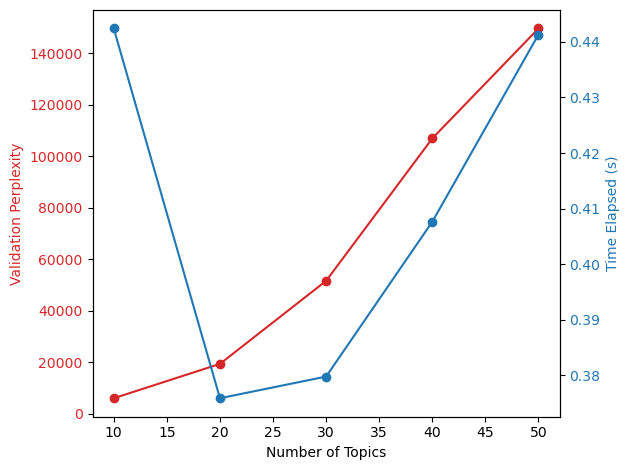

In [6]:
import time
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Veriyi oku
filename = "factoryReports.csv"
data = pd.read_csv(filename)
textData = data["Description"].astype(str)

# Veriyi train ve validation setlere ayır
X_train, X_validation = train_test_split(textData, test_size=0.2, random_state=42)

# CountVectorizer'ı kullanarak metin verilerini vektörlere dönüştür
vectorizer = CountVectorizer(stop_words="english")
X_train_vectorized = vectorizer.fit_transform(X_train)
X_validation_vectorized = vectorizer.transform(X_validation)

numTopicsRange = [10,20,30,40,50]
validationPerplexity = []
timeElapsed = []

for numTopics in numTopicsRange:
    start_time = time.time()
    lda = LatentDirichletAllocation(n_components=numTopics, random_state=42)
    lda.fit(X_train_vectorized)
    
    validation_perplexity = lda.perplexity(X_validation_vectorized)
    validationPerplexity.append(validation_perplexity)
    
    elapsed_time = time.time() - start_time
    timeElapsed.append(elapsed_time)

# Sonuçları görselleştir
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Number of Topics')
ax1.set_ylabel('Validation Perplexity', color=color)
ax1.plot(numTopicsRange, validationPerplexity, color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Time Elapsed (s)', color=color)
ax2.plot(numTopicsRange, timeElapsed, color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()
